In [1]:
import torch
import numpy as np
from Networks.mesh2mesh import *
from Networks.rgbd2mesh import RGBD2Mesh
import trimesh
from Networks.obj2pointcloud import *

In [2]:
numpoints = 11928

PNE = PointNetEncoder(return_point_features=True, numpoints=numpoints)
PND = PointNetDecoder(numpoints=numpoints)
input = torch.rand(2,3,numpoints)
print(input.shape)
output = PNE(input)
print(output.shape)
recon = PND(output)
print(recon.shape)

torch.Size([2, 3, 11928])
torch.Size([2, 1088, 11928])
torch.Size([2, 11928, 3])


In [3]:
depthIntrinsics = np.array([[711.1111,0.0,255.5],[0.0,711.1111,255.5],[0,0,1]])
depthExtrinsics = np.array([[0.6859, 0.7277, 0.0, -0.03], [0.324, -0.3054, -0.8954, -0.054], [-0.6516, 0.6142, -0.4453, 1.9951], [0.0, 0.0, 0.0, 1.0]])
import OpenEXR
depthimg = OpenEXR.InputFile("./objects/000021_depth0001.exr").channel('R')
#depthimg = OpenEXR.InputFile("./Networks/depth0001.exr").channel('R')
print(type(depthimg))
depth = np.frombuffer(depthimg, dtype=np.float32)

print(depth)
print(depth.shape)
rgb2mesh = RGBD2Mesh(depth, 512,512, depthIntrinsics, depthExtrinsics)
pcd = rgb2mesh.tomesh()
rgb2mesh.create_faces('./testfaces.off')

<class 'bytes'>
[65504. 65504. 65504. ... 65504. 65504. 65504.]
(262144,)


True

In [4]:
file = open('./Data/shapenetdata/1033f41fd2decfa938da3ea2c9e0e4f/pcd_gt.obj')
obj = trimesh.exchange.obj.load_obj(file)
obj['vertices'].shape

(40000, 3)

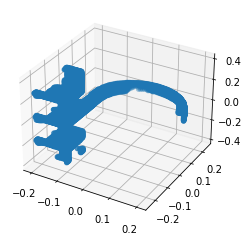

KeyError: 'faces'

In [5]:
obj['vertices'].shape
obj_pcd = trimesh.points.PointCloud(obj['vertices'])
obj_pcd.show()
trimesh.points.plot_points(pcd)


pcd_full = sample_point_cloud(obj['vertices'], obj['faces'], 20000)
trimesh.points.plot_points(pcd_full)
pcd_full.shape

export_pointcloud_to_obj('./pcd_full.obj', pcd_full)


pcd_recon = rgb2mesh.to_pcd(10000)
trimesh.points.plot_points(pcd_recon)
export_pointcloud_to_obj('./pcd_recon.obj', pcd_recon)




In [10]:
type(pcd)

numpy.ndarray

In [12]:
obj['vertices'].shape


(4513, 3)

In [25]:
t = t[None,:,:]

In [29]:
t2 = torch.cat((t,t),dim=0)
t2.shape

torch.Size([2, 3, 11928])

In [27]:
EPOCH=10

for epoch in range(EPOCH):
    


torch.Size([1, 3, 11928])